In [1]:
#import all the packages that needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in the data file into a pandas DataFrame format
data = pd. read_csv (
'AmesHousing.txt',
sep='\t',
keep_default_na =False ,
na_values =[''])

# 1.0 Introduction

In [3]:
#Brief overview of the dataset
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NA,IR1,Lvl,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NA,IR1,Low,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [4]:
#Drop two columns that does not have any  impact on predicting sales prices
data_1 = data.drop(['Order','PID'], axis = 1)
data_1

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NA,IR1,Low,AllPub,Inside,...,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,4,2006,WD,Normal,170000


In [5]:
#Check some statistical data of the dataset
data_1.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
#Check the type of variables
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

In [7]:
#Numbers of missing values in this dataset

total = (data_1.isnull().sum().sum())
print("Numbers of missing values in total: {}".format(total))
#Print the columns name with how many missing values are under that feature
MissingValue = data_1.isnull().sum().sort_values(ascending = False)
MissingValue[MissingValue > 0]



Numbers of missing values in total: 719


Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Exposure       4
Garage Finish       2
BsmtFin Type 2      2
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Area         1
Garage Qual         1
Bsmt Qual           1
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Cars         1
Bsmt Cond           1
Garage Cond         1
Electrical          1
dtype: int64

In [8]:
#Load the data column of the dataset
data_1.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

# 2.0 Candidate Model

In [9]:
# Create a DataFrame that only contains numerical features
num_list = ['Lot Frontage','Lot Area','Year Built','Year Remod/Add','Mas Vnr Area',
            'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF',
            '2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath',
           'Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces',
           'Garage Yr Blt','Garage Cars','Garage Area','Wood Deck SF','Open Porch SF',
            'Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val','Mo Sold',
           'Yr Sold','SalePrice']
numdf = data_1[num_list]
numdf

,Lot Frontage,Lot Area,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.0,31770,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,...,210,62,0,0,0,0,0,5,2010,215000
1,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,...,140,0,0,0,120,0,0,6,2010,105000
2,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.0,11160,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,0,0,0,0,4,2010,244000
4,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,...,120,0,0,0,0,0,0,3,2006,142500
2926,NaN,8885,1983,1983,0.0,301.0,324.0,239.0,864.0,902,...,164,0,0,0,0,0,0,6,2006,131000
2927,62.0,10441,1992,1992,0.0,337.0,0.0,575.0,912.0,970,...,80,32,0,0,0,0,700,7,2006,132000
2928,77.0,10010,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,...,240,38,0,0,0,0,0,4,2006,170000


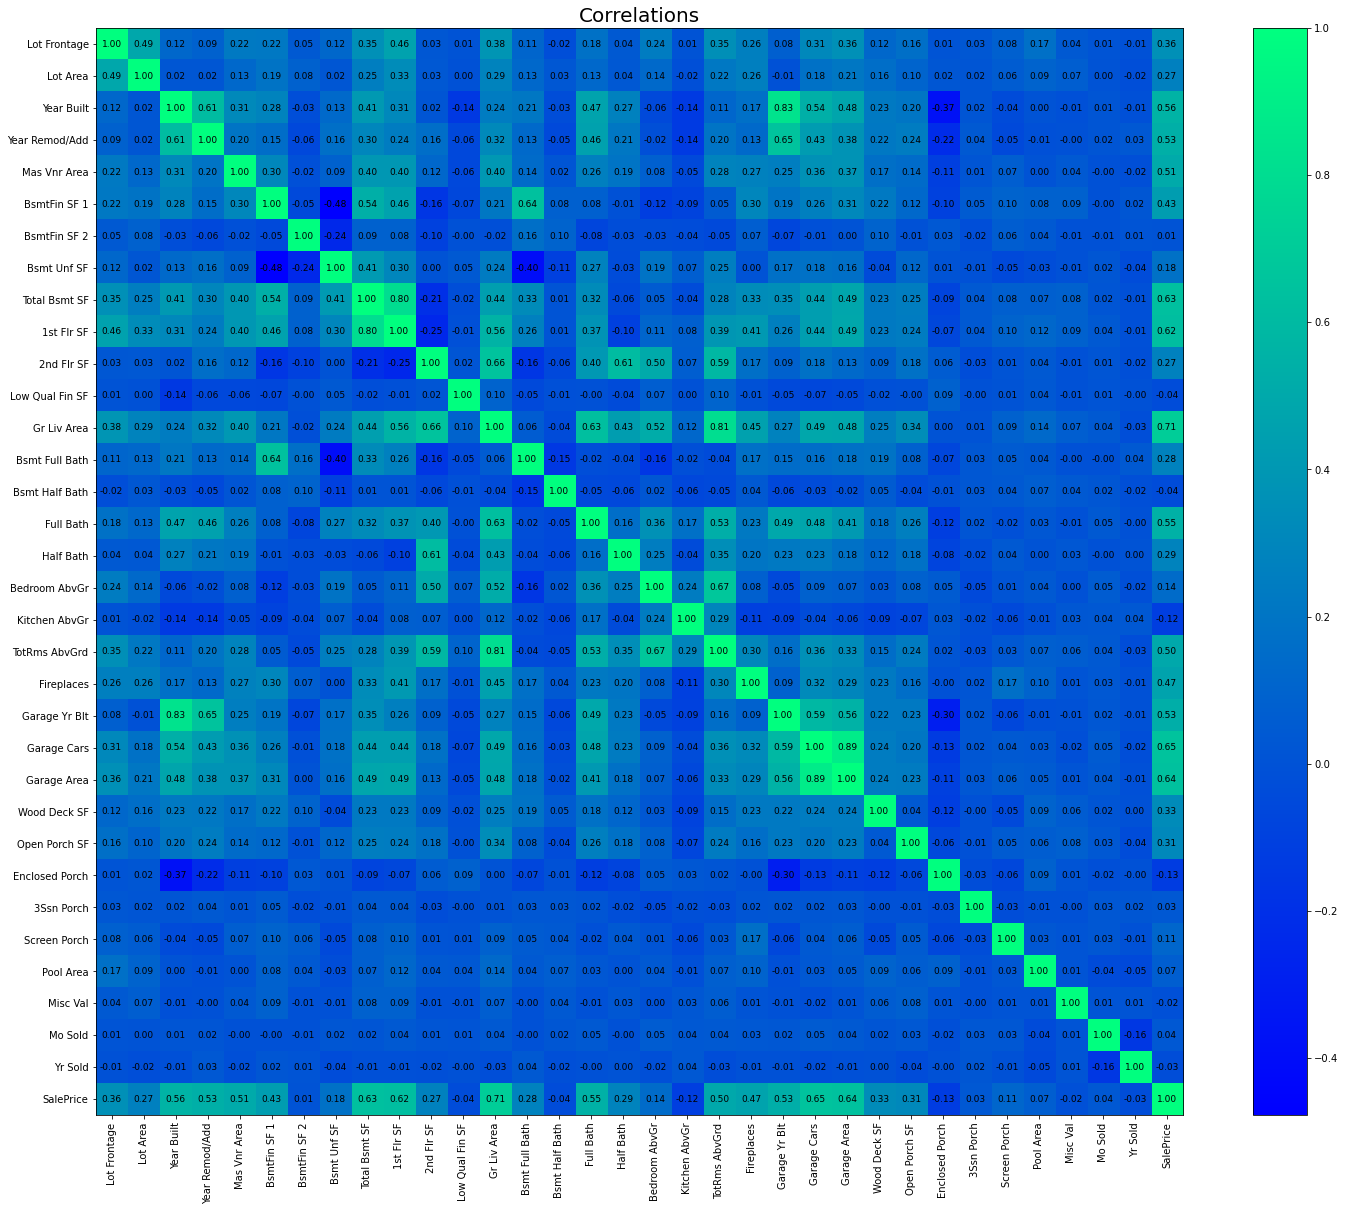

In [10]:
#Use heatmap to see the correlation between these numerical variables and 'SalePrice'
corr = numdf.corr()
n_var = len(corr)

plt.figure(figsize = (25,20))
plt.imshow(corr, cmap = "winter")

plt.xticks(range(n_var), corr.columns, rotation = 90)
plt.yticks(range(n_var), corr.columns)

for i in range (n_var):
    for j in range(n_var):
        plt.text(i, j, '{:.2f}'.format(corr.iloc[i,j]), ha = "center", va="center",fontsize = 9)


plt.colorbar()
plt.title("Correlations", fontsize = 20)
plt.show()

In [11]:
#Display the correlation between SalePrice and all other variables in the dataset

PricenOther = data_1.corr()['SalePrice'].sort_values(ascending = False).round(5)
PricenOther

SalePrice          1.00000
Overall Qual       0.79926
Gr Liv Area        0.70678
Garage Cars        0.64788
Garage Area        0.64040
Total Bsmt SF      0.63228
1st Flr SF         0.62168
Year Built         0.55843
Full Bath          0.54560
Year Remod/Add     0.53297
Garage Yr Blt      0.52697
Mas Vnr Area       0.50828
TotRms AbvGrd      0.49547
Fireplaces         0.47456
BsmtFin SF 1       0.43291
Lot Frontage       0.35732
Wood Deck SF       0.32714
Open Porch SF      0.31295
Half Bath          0.28506
Bsmt Full Bath     0.27605
2nd Flr SF         0.26937
Lot Area           0.26655
Bsmt Unf SF        0.18286
Bedroom AbvGr      0.14391
Screen Porch       0.11215
Pool Area          0.06840
Mo Sold            0.03526
3Ssn Porch         0.03222
BsmtFin SF 2       0.00589
Misc Val          -0.01569
Yr Sold           -0.03057
Bsmt Half Bath    -0.03584
Low Qual Fin SF   -0.03766
MS SubClass       -0.08509
Overall Cond      -0.10170
Kitchen AbvGr     -0.11981
Enclosed Porch    -0.12879
N

### Model 1

X1 = Total square feet of basement area

X2 = Above grade (ground) living area square feet


 
${Y}_{SalePrice} = {\beta}_{0} + {\beta}_{1} * {TotalBsmtSF} + {\beta}_{2} * {Gr Liv Area} +{ε}$

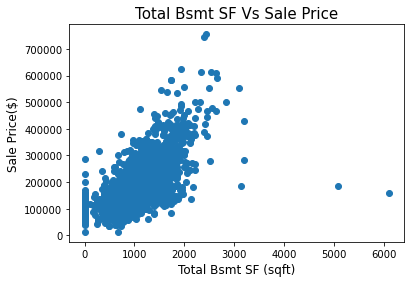

In [12]:
#Observe whether there is linear relationship exist between two variables
bsmt = data_1['Total Bsmt SF']
plt.scatter(bsmt, data_1['SalePrice'])

plt.xlabel('Total Bsmt SF (sqft)', size = 12)
plt.ylabel('Sale Price($)', size = 12)
plt.title('Total Bsmt SF Vs Sale Price', size = 15)
plt.show()

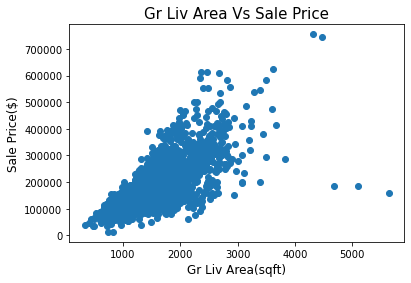

In [13]:
#Observe whether there is linear relationship exist between two variables
gr = data_1['Gr Liv Area']
plt.scatter(gr, data_1['SalePrice'])

plt.xlabel('Gr Liv Area(sqft)', size = 12)
plt.ylabel('Sale Price($)', size = 12)
plt.title('Gr Liv Area Vs Sale Price', size = 15)
plt.show()

In [14]:
#Processing of features with missing values
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
data_1['Total Bsmt SF'].fillna(data_1['Total Bsmt SF'].mean(), inplace = True)

In [15]:
#Prepare the data
y = data_1['SalePrice'].to_numpy()
X_list1 = ['Total Bsmt SF','Gr Liv Area']
X1 = data_1[X_list1].to_numpy()

#fit model
M1 = LinearRegression()
M1.fit(X1,y)

#extract the model
print("beta 0 (intercept): {:.2f}".format(M1.intercept_))
for i in range(len(X_list1)):
    print("beta {}: {:.2f}".format((i+1),M1.coef_[i]))

beta 0 (intercept): -20520.29
beta 1: 71.85
beta 2: 83.86


### Model 2

X1 = Total square feet of basement area

X2 = Above grade (ground) living area square feet

X3 = Size of garage in square feet

X4 = First Floor square feet

X5 = Second floor square feet
 
${Y}_{SalePrice} = {\beta}_{0} + {\beta}_{1} * {TotalBsmtSF} + {\beta}_{2} * {Gr Liv Area} + {\beta}_{3}*{GarageArea} + {\beta}_{4} * {1stFlrSF} + {\beta}_{5} * {2ndFlrSF} + {ε}$



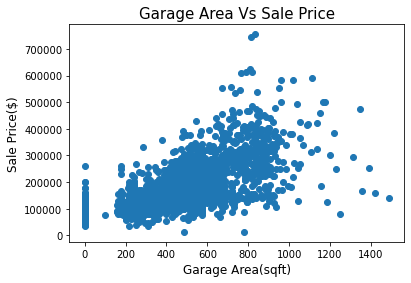

In [16]:
#Observe whether there is linear relationship exist between two variables
gararea = data_1['Garage Area']
plt.scatter(gararea, data_1['SalePrice'])

plt.xlabel('Garage Area(sqft)', size = 12)
plt.ylabel('Sale Price($)', size = 12)
plt.title('Garage Area Vs Sale Price', size = 15)
plt.show()

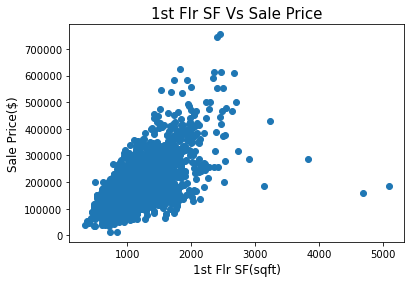

In [17]:
#Observe whether there is linear relationship exist between two variables
firstfloor = data_1['1st Flr SF']
plt.scatter(firstfloor, data_1['SalePrice'])

plt.xlabel('1st Flr SF(sqft)', size = 12)
plt.ylabel('Sale Price($)', size = 12)
plt.title('1st Flr SF Vs Sale Price', size = 15)
plt.show()

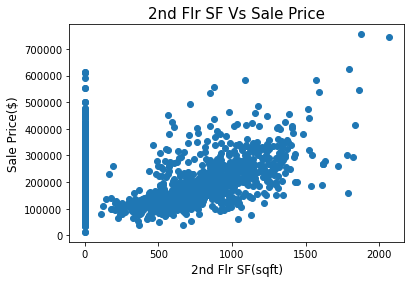

In [18]:
#Observe whether there is linear relationship exist between two variables
secondfloor = data_1['2nd Flr SF']
plt.scatter(secondfloor, data_1['SalePrice'])

plt.xlabel('2nd Flr SF(sqft)', size = 12)
plt.ylabel('Sale Price($)', size = 12)
plt.title('2nd Flr SF Vs Sale Price', size = 15)
plt.show()

In [19]:
##Processing of features with missing values
data_1['Garage Area'].fillna(data_1['Garage Area'].mean(), inplace = True)

In [20]:
#Prepare the data
y = data_1['SalePrice'].to_numpy()
X_list2 = ['Total Bsmt SF','Gr Liv Area','Garage Area','1st Flr SF', '2nd Flr SF']
X2 = data_1[X_list2].to_numpy()

#fit model
M2 = LinearRegression()
M2.fit(X2,y)

#extract the model
print("beta 0 (intercept): {:.2f}".format(M2.intercept_))
for i in range(len(X_list2)):
    print("beta {}: {:.2f}".format((i+1),M2.coef_[i]))

beta 0 (intercept): -29224.65
beta 1: 55.85
beta 2: -31.57
beta 3: 102.84
beta 4: 99.68
beta 5: 102.60


### Model 3

X1 = Total square feet of basement area

X2 = Above grade (ground) living area square feet

X3 = Size of garage in square feet

X4 = First Floor square feet

X5 = Second floor square feet

X6 = paved or not paved

X7 = central air conditioning is available or not in property
 
${Y}_{SalePrice} = {\beta}_{0} + {\beta}_{1} * {TotalBsmtSF} + {\beta}_{2} * {Gr Liv Area} + {\beta}_{3}*{GarageArea} + {\beta}_{4} * {1stFlrSF} + {\beta}_{5} * {2ndFlrSF} + {\beta}_{6} * {PavedRoadyes} + {\beta}_{7} * {CentralAiryes} + {ε}$

In [21]:
data_1['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [22]:
streetdummy = pd.get_dummies(data_1['Street'], drop_first = True)
data_1['PavedRoad_yes'] = streetdummy
data_1['PavedRoad_yes'].value_counts()

1    2918
0      12
Name: PavedRoad_yes, dtype: int64

In [23]:
data_1['Central Air'].value_counts()

Y    2734
N     196
Name: Central Air, dtype: int64

In [24]:
cadummy = pd.get_dummies(data_1['Central Air'],drop_first = True)
data_1['Central_Air_yes'] = cadummy
data_1['Central_Air_yes']
data_1['Central_Air_yes'].value_counts()

1    2734
0     196
Name: Central_Air_yes, dtype: int64

In [25]:
#Prepare the data
y = data_1['SalePrice'].to_numpy()
X_list3 = ['Total Bsmt SF','Gr Liv Area','Garage Area','1st Flr SF', '2nd Flr SF','PavedRoad_yes','Central_Air_yes']
X3 = data_1[X_list3].to_numpy()

#fit model
M3 = LinearRegression()
M3.fit(X3,y)

#extract the model
print("beta 0 (intercept): {:.2f}".format(M3.intercept_))
for i in range(len(X_list3)):
    print("beta {}: {:.2f}".format((i+1),M3.coef_[i]))

beta 0 (intercept): -68860.99
beta 1: 53.07
beta 2: -28.96
beta 3: 96.86
beta 4: 98.77
beta 5: 99.94
beta 6: 21874.87
beta 7: 23193.30


# 3.0 Model estimation and selection

In [26]:
X = data_1
y = data_1['SalePrice']

#Train_test_Split
#80% - 20%
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

#train_validation_test:
#60% - 20% - 20%
X_train, X_vali, y_train, y_vali = train_test_split(X_tv, y_tv, test_size = 0.25 , random_state = 23)

X_train.shape, X_vali.shape, X_test.shape

((1758, 82), (586, 82), (586, 82))

### Model 1

In [27]:
#Prepare the data needed in Model 1
selectedlist1 = ['Total Bsmt SF','Gr Liv Area']
X1_train = X_train[selectedlist1].to_numpy()
y1_train = y_train.to_numpy()

# Model Estimation - fit model - LinearRegression
Model_1 = LinearRegression()
Model_1.fit(X1_train, y1_train)

#Extract the model
print("The estimated results in Model 1 are :")
print("beta 0 (intercept): {:.2f}".format(Model_1.intercept_))
for i in range(len(selectedlist1)):
    print("beta {}: {:.2f}".format((i+1), Model_1.coef_[i]))


# Model Selection - Use validation set to predict
X1_vali = X_vali[selectedlist1].to_numpy()
Model_1_pred_y = Model_1.predict(X1_vali)

# Model Validation - Calculate MSE
Model_1_MSE = mse(y_vali, Model_1_pred_y)
print("Model 1 MSE: {:.2f}".format(Model_1_MSE))

The estimated results in Model 1 are :
beta 0 (intercept): -25649.13
beta 1: 74.97
beta 2: 85.68
Model 1 MSE: 2378013952.38


${Y}_{SalePrice} = {-25649.13} + {74.97} * {TotalBsmtSF} + {85.68} * {Gr Liv Area} +{ε}$

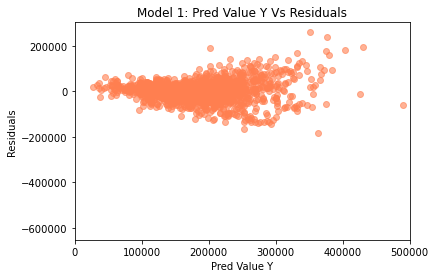

In [28]:

#Calculate Residuals
fittedvalue1 = Model_1.predict(X1_train)
residuals1 = y1_train - fittedvalue1

#Assumption 1: Linearity

plt.scatter(fittedvalue1,residuals1, color = 'coral', alpha = 0.6)
plt.xlim(0,500000)
plt.xlabel("Pred Value Y")
plt.ylabel("Residuals")
plt.title("Model 1: Pred Value Y Vs Residuals")
plt.show()

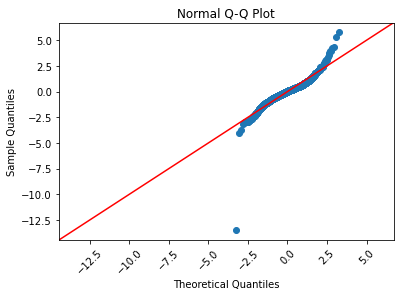

In [29]:
#Assumption 3: Normality

#Standarization
residuals1st = (residuals1 - residuals1.mean())/residuals1.std()
residuals1st

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals1st, line ='45')
plt.xticks(rotation = 45)
plt.title("Normal Q-Q Plot")
plt.show()

Text(0.5, 1.0, 'Model 1: Pred Value Y Vs Residuals^2')

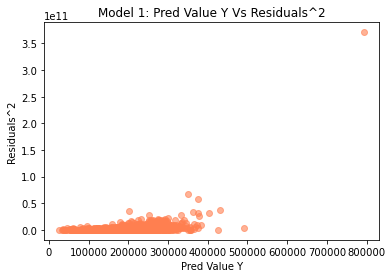

In [30]:
#Assumption 4: Homoscedasticity: 
plt.scatter(fittedvalue1, residuals1**2, color = 'coral', alpha = 0.6)
plt.xlabel("Pred Value Y")
plt.ylabel("Residuals^2")
plt.title("Model 1: Pred Value Y Vs Residuals^2")

### Model 2 

In [31]:
#Prepare the data needed in Model 2
selectedlist2 = ['Total Bsmt SF','Gr Liv Area','Garage Area','1st Flr SF', '2nd Flr SF']
X2_train = X_train[selectedlist2].to_numpy()
y2_train = y_train.to_numpy()

# Model Estimation - fit model - LinearRegression
Model_2 = LinearRegression()
Model_2.fit(X2_train, y2_train)

#Extract the model
print("The estimated results in Model 2 are :")
print("beta 0 (intercept): {:.2f}".format(Model_2.intercept_))
for i in range(len(selectedlist2)):
    print("beta {}: {:.2f}".format((i+1), Model_2.coef_[i]))



# Model Selection - Use validation set to predict
X2_vali = X_vali[selectedlist2].to_numpy()
Model_2_pred_y = Model_2.predict(X2_vali)

# Model Validation - Calculate MSE
Model_2_MSE = mse(y_vali, Model_2_pred_y)
print("Model 2 MSE: {:.2f}".format(Model_2_MSE))

The estimated results in Model 2 are :
beta 0 (intercept): -31820.92
beta 1: 63.16
beta 2: -18.06
beta 3: 97.02
beta 4: 83.52
beta 5: 92.95
Model 2 MSE: 2051223495.20


${Y}_{SalePrice} = {-31820.92} + {63.16} * {TotalBsmtSF}  {-18.06} * {Gr Liv Area} + {97.02}*{GarageArea} + {83.52} * {1stFlrSF} + {92.95} * {2ndFlrSF} + {ε}$

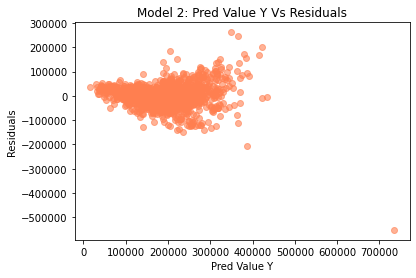

In [32]:
#Calculate Residuals
fittedvalue2 = Model_2.predict(X2_train)
residuals2 = y2_train - fittedvalue2


#Assumption 1: Linearity
plt.scatter(fittedvalue2, residuals2, color = 'coral', alpha = 0.6)
plt.xlabel("Pred Value Y")
plt.ylabel("Residuals")
plt.title("Model 2: Pred Value Y Vs Residuals")
plt.show()


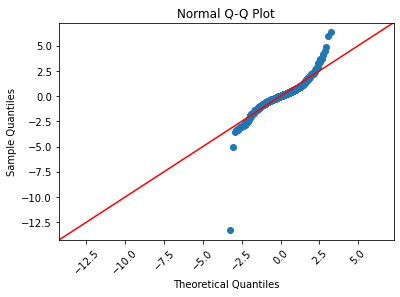

In [33]:
#Assumption 3: Normality

#Standarization
residuals2st = (residuals2 - residuals2.mean())/residuals2.std()
residuals2st

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals2st, line ='45')
plt.xticks(rotation = 45)
plt.title("Normal Q-Q Plot")
plt.show()

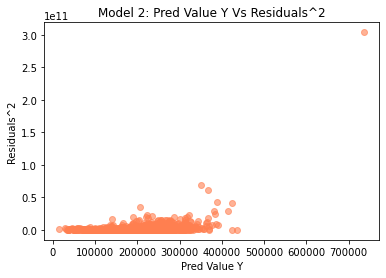

In [34]:
#Assumption 4: Homoscedasticity: 
plt.scatter(fittedvalue2, residuals2**2,color = 'coral', alpha = 0.6)
plt.xlabel("Pred Value Y")
plt.ylabel("Residuals^2")
plt.title("Model 2: Pred Value Y Vs Residuals^2")
plt.show()

### Model 3

In [35]:
#Prepare the data needed in Model 3
selectedlist3 = ['Total Bsmt SF','Gr Liv Area','Garage Area','1st Flr SF', '2nd Flr SF',
                'PavedRoad_yes','Central_Air_yes']
X3_train = X_train[selectedlist3].to_numpy()
y3_train = y_train.to_numpy()

# Model Estimation - fit model - LinearRegression
Model_3 = LinearRegression()
Model_3.fit(X3_train, y3_train)

#Extract the model
print("The estimated results in Model 3 are :")
print("beta 0 (intercept): {:.2f}".format(Model_3.intercept_))
for i in range(len(selectedlist3)):
    print("beta {}: {:.2f}".format((i+1), Model_3.coef_[i]))
    

# Model Selection - Use validation set to predict
X3_vali = X_vali[selectedlist3].to_numpy()
Model_3_pred_y = Model_3.predict(X3_vali)

# Model Validation - Calculate MSE
Model_3_MSE = mse(y_vali, Model_3_pred_y)
print("Model 3 MSE: {:.2f}".format(Model_3_MSE))

The estimated results in Model 3 are :
beta 0 (intercept): -68707.01
beta 1: 59.87
beta 2: -13.62
beta 3: 92.34
beta 4: 81.00
beta 5: 88.00
beta 6: 20533.22
beta 7: 21387.32
Model 3 MSE: 2017447456.43


${Y}_{SalePrice} = {-68707.01} + {59.87} * {TotalBsmtSF}  {-13.62} * {Gr Liv Area} + {92.34}*{GarageArea} + {81.00} * {1stFlrSF} + {88.00} * {2ndFlrSF} + {20533.22} * {PavedRoadyes} + {21387.32} * {CentralAiryes} + {ε}$

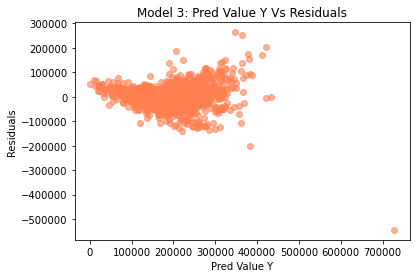

In [36]:
#Calculate Residuals
fittedvalue3 = Model_3.predict(X3_train)
residuals3 = y3_train - fittedvalue3

#Examine the assumptions on error terms (residuals)
#Assumption 1: Linearity
plt.scatter(fittedvalue3, residuals3, color = 'coral', alpha = 0.6)
plt.xlabel("Pred Value Y")
plt.ylabel("Residuals")
plt.title("Model 3: Pred Value Y Vs Residuals")
plt.show()

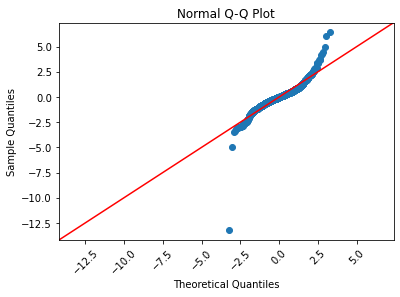

In [37]:
#Assumption 3: Normality

#Standarization
residuals3st = (residuals3 - residuals3.mean())/residuals3.std()
residuals3st

from statsmodels.graphics.gofplots import qqplot
qqplot(residuals3st, line ='45')
plt.xticks(rotation = 45)
plt.title("Normal Q-Q Plot")
plt.show()

Text(0.5, 1.0, 'Model 3: Pred Value Y Vs Residuals^2')

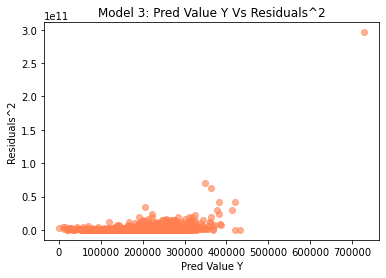

In [38]:
#Assumption 4: Homoscedasticity: 
plt.scatter(fittedvalue3, residuals3**2, color = 'coral', alpha = 0.6)
plt.xlabel("Pred Value Y")
plt.ylabel("Residuals^2")
plt.title("Model 3: Pred Value Y Vs Residuals^2")

In [39]:
msedata = {'Model 1 MSE': [2378013952.38], 'Model 2 MSE': [2051223495.20]
           , 'Model 3 MSE': [2017447456.43]}
df_mse = pd.DataFrame(data = msedata)
df_mse

,Model 1 MSE,Model 2 MSE,Model 3 MSE
0,2.378014e+09,2.051223e+09,2.017447e+09


In [40]:
if Model_3_MSE < Model_2_MSE < Model_1_MSE:
    print("Model 3 is the best model with lowest MSE: {:.2f}".format(Model_3_MSE))

Model 3 is the best model with lowest MSE: 2017447456.43


# 4.0 Model Evaluation


In [112]:
X = data_1
y = data_1['SalePrice']

#Train_test_Split
#80% - 20%
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

#train_validation_test:
#60% - 20% - 20%
X_train, X_vali, y_train, y_vali = train_test_split(X_tv, y_tv, test_size = 0.25 , random_state = 23)


In [113]:
#Prepare the data needed in Selected Model - 3
selectedlist3 = ['Total Bsmt SF','Gr Liv Area','Garage Area','1st Flr SF', '2nd Flr SF',
                'PavedRoad_yes','Central_Air_yes']
X3_tvset = X_tv[selectedlist3].to_numpy()
y3_tvset = y_tv.to_numpy()

# Model Estimation - fit model - LinearRegression
selectedmodel = LinearRegression()
selectedmodel.fit(X3_tvset, y3_tvset)

#Model selection - Predict using test set
X3_test = X_test[selectedlist3].to_numpy()
selectedmodel_pred_y = selectedmodel.predict(X3_test)

selectedmodel_pred_y.shape

(586,)

In [114]:
selectedmodel_pred_y

array([ 79937.83193744, 179695.83843424, 179437.06120872,  59757.11379194,
       351709.7345415 , 242818.0965518 , 249737.51994587, 277766.12606572,
       227429.26829435, 198337.82199082, 153339.10142251, 156160.98745791,
       196313.32896634, 155136.78076067, 100222.55535586, 168443.90819542,
       265547.53734587, 254250.87360383, 126394.68699902, 200245.37224564,
       133598.98253844,  95921.82610979, 137638.93278162, 147211.34049034,
       203525.39596914, 288934.6810595 , 212868.40541342, 154909.74142715,
       176386.41363234, 107871.77122796, 176909.19589026, 190834.88801671,
       229773.93790566, 168369.91696543, 111176.10245946, 229684.93130379,
       165773.98896072, 260076.22447633, 419392.56160387, 152204.22688551,
       177270.39528473, 112239.70671563, 212373.05425773, 117003.66239992,
       264148.3778428 , 195892.99441561, 188727.77928018,  85097.97678568,
       121527.86953505, 342758.81828159, 100222.55535586, 203434.51502082,
       175863.89498056, 1

# First Benchmark Model

In [271]:
#Average price
bm1_constantmean = y_tv.mean()
bm1_constantmean

181345.71501706485

# Second Benchmark Model

In [272]:
#Average sale price of different neighborhood
nbhdgp = X_test.groupby('Neighborhood').mean()['SalePrice']
#https://www.w3schools.com/python/ref_func_dict.asp
pricebynbhd = dict(nbhdgp)
pricebynbhd

{'Blmngtn': 211810.0,
 'Blueste': 115000.0,
 'BrDale': 98150.0,
 'BrkSide': 123183.92857142857,
 'ClearCr': 220890.0,
 'CollgCr': 210404.40476190476,
 'Crawfor': 217392.59259259258,
 'Edwards': 126166.14285714286,
 'Gilbert': 193905.03333333333,
 'Greens': 201000.0,
 'IDOTRR': 100804.6875,
 'MeadowV': 93738.88888888889,
 'Mitchel': 151525.0,
 'NAmes': 148053.51219512196,
 'NPkVill': 143150.0,
 'NWAmes': 197307.6923076923,
 'NoRidge': 337522.3076923077,
 'NridgHt': 322090.85294117645,
 'OldTown': 122499.62686567164,
 'SWISU': 131000.0,
 'Sawyer': 133440.0,
 'SawyerW': 185632.4347826087,
 'Somerst': 225783.13333333333,
 'StoneBr': 308457.25,
 'Timber': 249442.07142857142,
 'Veenker': 258300.0}

In [279]:
#replace all the sale prices to predicted sale price by 'neighborhood category'
#REF: https://kanoki.org/2019/07/17/pandas-how-to-replace-values-based-on-conditions/

predbycategory = pd.DataFrame(X_test)
df_nbhd_price = predbycategory[['Neighborhood','SalePrice']]

df_nbhd_price.loc[(X_test['Neighborhood'] == 'Blmngtn'),'SalePrice'] = 211810.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Blueste'),'SalePrice'] = 115000.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'BrDale'),'SalePrice'] = 98150.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'BrkSide'),'SalePrice'] = 123183.92857142857
df_nbhd_price.loc[(X_test['Neighborhood'] == 'ClearCr'),'SalePrice'] = 220890.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'CollgCr'),'SalePrice'] = 210404.40476190476
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Crawfor'),'SalePrice'] = 217392.59259259258
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Edwards'),'SalePrice'] = 126166.14285714286
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Gilbert'),'SalePrice'] = 193905.03333333333
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Greens'),'SalePrice'] = 201000.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'IDOTRR'),'SalePrice'] = 100804.6875
df_nbhd_price.loc[(X_test['Neighborhood'] == 'MeadowV'),'SalePrice'] = 93738.88888888889
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Mitchel'),'SalePrice'] = 151525.0

df_nbhd_price.loc[(X_test['Neighborhood'] == 'NAmes'),'SalePrice'] = 148053.51219512196
df_nbhd_price.loc[(X_test['Neighborhood'] == 'NPkVill'),'SalePrice'] = 143150.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'NWAmes'),'SalePrice'] = 197307.6923076923

df_nbhd_price.loc[(X_test['Neighborhood'] == 'NoRidge'),'SalePrice'] = 337522.3076923077
df_nbhd_price.loc[(X_test['Neighborhood'] == 'NridgHt'),'SalePrice'] = 322090.85294117645
df_nbhd_price.loc[(X_test['Neighborhood'] == 'OldTown'),'SalePrice'] = 122499.62686567164
df_nbhd_price.loc[(X_test['Neighborhood'] == 'SWISU'),'SalePrice'] = 131000.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Sawyer'),'SalePrice'] = 133440.0
df_nbhd_price.loc[(X_test['Neighborhood'] == 'SawyerW'),'SalePrice'] = 185632.4347826087
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Somerst'),'SalePrice'] = 225783.13333333333
df_nbhd_price.loc[(X_test['Neighborhood'] == 'StoneBr'),'SalePrice'] = 308457.25
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Timber'),'SalePrice'] = 249442.07142857142
df_nbhd_price.loc[(X_test['Neighborhood'] == 'Veenker'),'SalePrice'] = 258300.0


benchmark2_pred_price = df_nbhd_price['SalePrice']

# Compare and Contrast the model with two Benchmark Models

In [281]:
CnC = pd.DataFrame()
CnC['Predicted by Benchmark 1'] = bm1_constantmean
CnC['Predicted by Benchmark 2'] = benchmark2_pred_price
CnC['Predicted by Selected Model'] = selectedmodel_pred_y
CnC['Actual Sale Price'] = y_test


In [282]:
CnC['Predicted by Benchmark 1'].fillna
CnC['Predicted by Benchmark 1'].fillna(bm1_constantmean, inplace = True)

In [283]:
CnC

,Predicted by Benchmark 1,Predicted by Benchmark 2,Predicted by Selected Model,Actual Sale Price
2233,181345.715017,100804.687500,79937.831937,87000
1735,181345.715017,193905.033333,179695.838434,176485
1912,181345.715017,148053.512195,179437.061209,158500
1513,181345.715017,126166.142857,59757.113792,98000
1764,181345.715017,337522.307692,351709.734541,410000
...,...,...,...,...
404,181345.715017,98150.000000,127765.153580,112000
1767,181345.715017,337522.307692,506122.024399,755000
1251,181345.715017,148053.512195,120696.047351,100000
590,181345.715017,197307.692308,202746.178340,167900


In [284]:
mse_benchmark1 =mse(CnC['Actual Sale Price'],CnC['Predicted by Benchmark 1'])
mse_benchmark2 =mse(CnC['Actual Sale Price'],CnC['Predicted by Benchmark 2'])
mse_selectedmodel = mse(CnC['Actual Sale Price'],CnC['Predicted by Selected Model'])

print('MSE for Benchmark Model 1 is: {:.2f}'.format(mse_benchmark1))
print('MSE for Benchmark Model 2 is: {:.2f}'.format(mse_benchmark2))
print('MSE for Selected Model is: {:.2f}'.format(mse_selectedmodel))


MSE for Benchmark Model 1 is: 6917990449.63
MSE for Benchmark Model 2 is: 2976958152.89
MSE for Selected Model is: 2893675306.01


In [285]:
msedata_new = {'BenchmarkModel 1 MSE': [6917990449.63], 'BenchmarkMode 2 MSE': [2976958152.89]
           , 'Selected Model MSE': [2893675306.01]}
df_mse_new = pd.DataFrame(data = msedata_new)
df_mse_new

,BenchmarkModel 1 MSE,BenchmarkMode 2 MSE,Selected Model MSE
0,6.917990e+09,2.976958e+09,2.893675e+09
